<a href="https://colab.research.google.com/github/Dikshuy/hail_UMICaana/blob/master/Achintya_LATEST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import cv2
import os
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Input, ZeroPadding2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, ZeroPadding2D, BatchNormalization, Add
from keras.models import Model
from tensorflow.keras.losses import MAE
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import keras
from keras import regularizers
from keras.initializers import glorot_uniform
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Letters'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Letters


In [38]:
pixel = 64
symbols = []
alphabets = []

img_path = '/content/drive/My Drive/Letters'
for file in os.listdir('/content/drive/My Drive/Letters'):
  img = cv2.imread(os.path.join(img_path, file))
  img = cv2.resize(img, (pixel, pixel))
  alpha = 1
  beta = 50
  for i in range(-3, 2):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta*i, 0, 255)
    symbols.append(new_img)
  alphabets.append(file[0])

print(len(alphabets))
print(len(symbols))


18
90


In [39]:
one_hot = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

data = []
label = []


for j in range(len(symbols)):
    data.append(symbols[j])

for j in range(len(alphabets)):
  for i in range(5):
    label.append(one_hot[j])

print(len(label), len(data), len(symbols))

for j in range(len(symbols)):
  for i in range(-5, 6):
    rows, cols = data[j].shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 5*i, 1)
    res = cv2.warpAffine(data[j], M, (rows, cols))
    label.append(label[j])
    data.append(res)

for i in range(len(data)):
  data[i] = cv2.resize(data[i], (pixel, pixel))
 
print(len(label), len(data))
num = len(label)
#cv2_imshow(data[100])


90 90 90
1080 1080


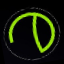

In [43]:
cv2_imshow(data[900])

In [44]:
for j in range(num):
  res_img = cv2.GaussianBlur(data[j], (3, 3), 0)
  data.append(res_img)
  label.append(label[j])
#cv2_imshow(data[150])
#print(len(label), len(data))

#for j in range(num):
  res_img = cv2.medianBlur(data[j], 5)
  data.append(res_img)
  label.append(label[j])
#cv2_imshow(data[250])
#print(len(label), len(data))

#for j in range(num):
  res_img = cv2.bilateralFilter(data[j], 11, 200, 200)
  data.append(res_img)
  label.append(label[j])
#cv2_imshow(data[360])
#print(len(label), len(data))
#print(len(alphabets))

#for j in range(num):
  res_img = cv2.erode(data[j], np.ones((3,3)), iterations = 1)
  data.append(res_img)
  label.append(label[j])
#print(len(label), len(data))
#cv2_imshow(data[480])
#print(len(alphabets))

#for j in range(num):
  res_img = cv2.dilate(data[j], np.ones((3, 3), np.uint8), iterations = 1)
  data.append(res_img)
  label.append(label[j])
#cv2_imshow(data[600])
#print(len(label), len(data))
#print(len(alphabets))

images = np.array(data).reshape(-1, pixel, pixel, 3)
print(images.shape)
y = np.array(label)
print(y.shape)


(6480, 64, 64, 3)
(6480, 18)


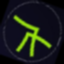

In [46]:
cv2_imshow(data[5000])

In [47]:
def res_identity(x, filters):
  x_skip = x
  f1, f2 = filters
  
  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  # x = Activation('relu')(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation('relu')(x)

  return x

In [48]:
def res_conv(x, s, filters):
  '''
  here the input size changes''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation('relu')(x)

  return x

In [49]:
def resnet50(input_shape = (pixel, pixel, 3), classes = len(alphabets)):

  input_im = Input(input_shape) 
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(alphabets), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  model = Model(inputs=input_im, outputs=x, name='Resnet50')

  return model

In [50]:
model = resnet50()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2)

history = model.fit(X_train, y_train, epochs = 40, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/40
52/52 [==============================] - 8s 151ms/step - loss: 19.9019 - accuracy: 0.6182 - val_loss: 20.7503 - val_accuracy: 0.2894
Epoch 2/40
52/52 [==============================] - 6s 110ms/step - loss: 15.9784 - accuracy: 0.9963 - val_loss: 15.6022 - val_accuracy: 0.6829
Epoch 3/40
52/52 [==============================] - 6s 111ms/step - loss: 13.4013 - accuracy: 0.9969 - val_loss: 13.7657 - val_accuracy: 0.5031
Epoch 4/40
52/52 [==============================] - 6s 111ms/step - loss: 11.3984 - accuracy: 0.9593 - val_loss: 39.7265 - val_accuracy: 0.2006
Epoch 5/40
52/52 [==============================] - 6s 111ms/step - loss: 9.6282 - accuracy: 0.9969 - val_loss: 8.8169 - val_accuracy: 0.9869
Epoch 6/40
52/52 [==============================] - 6s 111ms/step - loss: 8.0431 - accuracy: 0.9977 - val_loss: 7.5497 - val_accuracy: 0.9360
Epoch 7/40
52/52 [==============================] - 6s 112ms/step - loss: 6.8139 - accuracy: 0.9929 - val_loss: 6.5402 - val_accuracy: 0.892

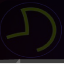

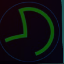

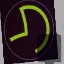

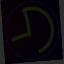

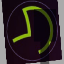

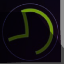

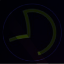

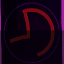

8
52


In [51]:
test = []
n = 0
t = 0
img_path = '/content/drive/My Drive/A'
for file in os.listdir(img_path):
  img = cv2.imread(os.path.join(img_path, file))
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #blur = cv2.GaussianBlur(img,(5,5),0)
  #ret3,th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  #cv2_imshow(th3)
  img = cv2.resize(img, (pixel, pixel))
  img = np.array(img).reshape(1, pixel, pixel, 3)
  #cv2_imshow(th3)
 # print(th3.shape)
  #probability_model = Sequential([model])
  predictions = model.predict(img)
  #print(len(predictions))
  #for i in range(len(predictions)):
  t+=1
  x = alphabets[np.argmax(predictions[0])]
  if x != 'A':
      #cv2_imshow(blur)
    cv2_imshow(img.reshape(pixel, pixel, 3))
      #cv2_imshow(th3.reshape(64, 64, 3))
    n+=1

print(n)
print(t)

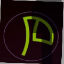

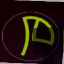

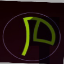

3
91


In [52]:
n = 0
t = 0
img_path = '/content/drive/My Drive/B'
for file in os.listdir(img_path):
  img = cv2.imread(os.path.join(img_path, file))
  img = cv2.resize(img, (pixel, pixel))
  img = np.array(img).reshape(1, pixel, pixel, 3)
  predictions = model.predict(img)
  t+=1
  x = alphabets[np.argmax(predictions[0])]
  if x != 'B':
    #print(alphabets[np.argmax(predictions)])
    #print(max(predictions[0]))
    cv2_imshow(img.reshape(pixel, pixel, 3))
    n+=1

print(n)
print(t)

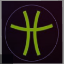

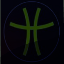

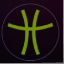

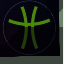

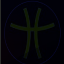

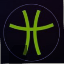

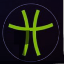

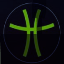

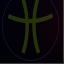

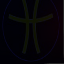

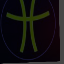

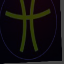

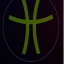

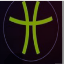

14
25


In [53]:
test = []
n = 0
t = 0
img_path = '/content/drive/My Drive/Y'
for file in os.listdir(img_path):
  img = cv2.imread(os.path.join(img_path, file))
  img = cv2.resize(img, (pixel, pixel))
  img = np.array(img).reshape(1, pixel, pixel, 3)
  predictions = model.predict(img)
  t+=1
  x = alphabets[np.argmax(predictions[0])]
  if x != 'Y':
    #print(alphabets[np.argmax(predictions)])
    #print(max(predictions[0]))
    cv2_imshow(img.reshape(pixel, pixel, 3))
    n+=1

print(n)
print(t)

In [73]:
n = 0
t = 0
img_path = '/content/drive/My Drive/Letters/Y.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (pixel, pixel))
img = np.array(img).reshape(1, pixel, pixel, 3)
predictions = model.predict(img)
print(alphabets[np.argmax(predictions[0])])
print(max(predictions[0]))

B
0.61458695


In [15]:
""""""

"""X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0"""
"""print(X_train.shape)
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(pixel, pixel, 3), activation='relu', padding = 'same'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(2048, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(1024, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(18))
model.add(Activation('softmax'))

epochs = 100
optimizer='adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

seed = 21
np.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)"""

"""epochs = 60
model = Sequential()
model.add(tf.keras.layers.Conv2D(156, (5, 5), padding='same', activation=tf.nn.relu, input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))

model.add(tf.keras.layers.Conv2D(156, (5, 5), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))

model.add(tf.keras.layers.Conv2D(156, (5, 5), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))

model.add(tf.keras.layers.Conv2D(296, (3, 3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))

model.add(tf.keras.layers.Conv2D(296, (3, 3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(18, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = epochs, batch_size=64, validation_data=(X_test, y_test))
"""

"epochs = 60\nmodel = Sequential()\nmodel.add(tf.keras.layers.Conv2D(156, (5, 5), padding='same', activation=tf.nn.relu, input_shape=(64, 64, 3)))\nmodel.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))\n\nmodel.add(tf.keras.layers.Conv2D(156, (5, 5), padding='same', activation=tf.nn.relu))\nmodel.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))\n\nmodel.add(tf.keras.layers.Conv2D(156, (5, 5), padding='same', activation=tf.nn.relu))\nmodel.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))\n\nmodel.add(tf.keras.layers.Conv2D(296, (3, 3), padding='same', activation=tf.nn.relu))\nmodel.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))\n\nmodel.add(tf.keras.layers.Conv2D(296, (3, 3), padding='same', activation=tf.nn.relu))\nmodel.add(tf.keras.layers.MaxPooling2D((2,2), strides = 2))\n\nmodel.add(tf.keras.layers.Flatten())\n\nmodel.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))\n\nmodel.add(tf.keras.layers.Dense(18, activation=tf.nn.softmax))\n\nmodel.compile(optim